In [1]:
! git clone https://www.github.com/DS3001/group12

Cloning into 'group12'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 41 (delta 12), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (41/41), 592.95 KiB | 8.85 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./group12/clean_data.csv')

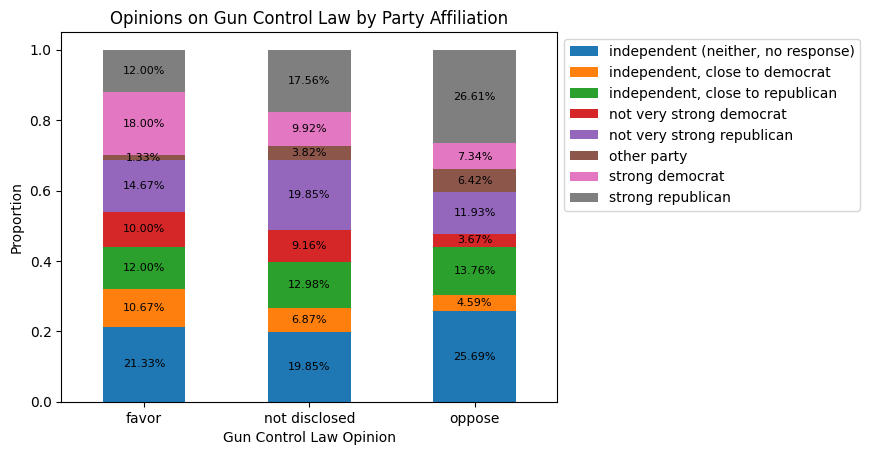

In [4]:
# Visualization 1: Stacked Bar Chart of Opinions on Gun Control Law by Party Affiliation
gunlaw_party = df.groupby(['gunlaw', 'partyid']).size().unstack()
gunlaw_party_percentage = gunlaw_party.div(gunlaw_party.sum(axis=1), axis=0)
subplot = gunlaw_party_percentage.plot(kind='bar', stacked=True)

for i in subplot.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    percentage = f'{height * 100:.2f}%'
    subplot.annotate(percentage, (x + width / 2, y + height / 2), ha='center', va='center',
                fontsize = 8)

plt.title('Opinions on Gun Control Law by Party Affiliation')
plt.xlabel('Gun Control Law Opinion')
plt.ylabel('Proportion')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()



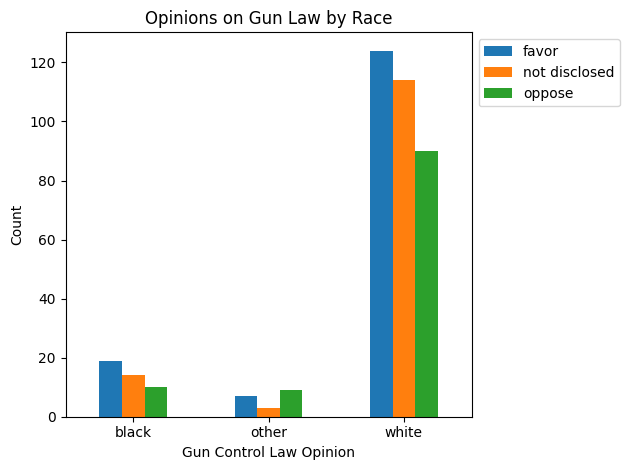

In [5]:
# Visualization 2: Grouped Bar Graph of Opinions on Gun Law by Race
gunlaw_party = df.groupby(['race', 'gunlaw']).size().unstack()
gunlaw_party.plot(kind='bar')
plt.title('Opinions on Gun Law by Race')
plt.xlabel('Gun Control Law Opinion')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

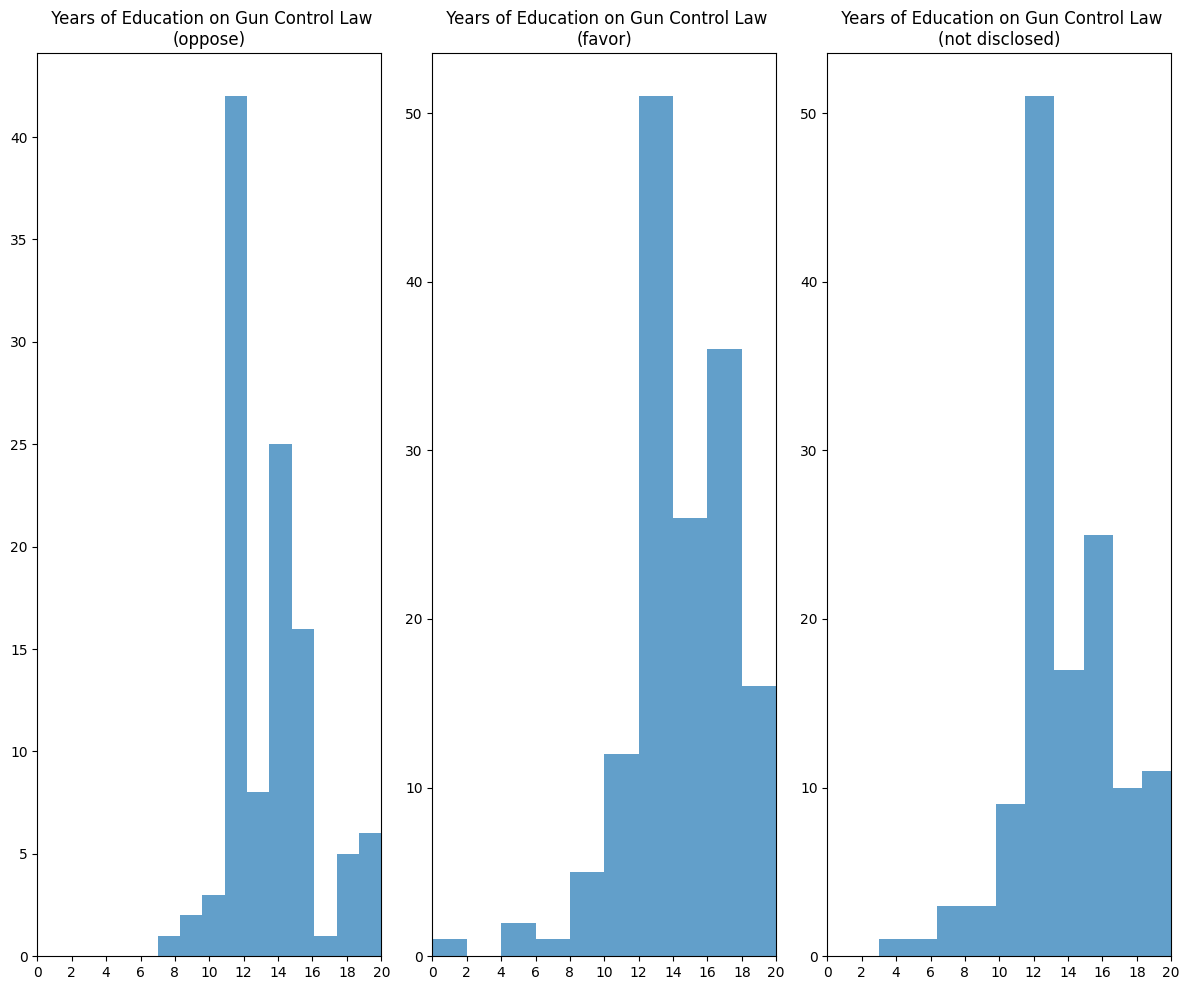

In [6]:
# Visualization 3: Histograms of Years of Education and Opinion on Gun Law

opinions = df['gunlaw'].unique()
plt.figure(figsize=(12, 10))

xlimits = (0, 20)
xticks = list(range(0, 22, 2))
for i, o in enumerate(opinions):
    plt.subplot(1, 3, i + 1)
    subset = df[df['gunlaw'] == o]
    plt.hist(subset['educ'], bins=10, alpha=0.7)
    plt.xlim(xlimits)
    plt.xticks(xticks)
    plt.title(f' Years of Education on Gun Control Law\n({o})')
plt.tight_layout()
plt.show()